In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

In [39]:
# Let's create some test data, with a few users, each running a few random jobs. 
users = ["Homer", "Bart", "Lisa", "Maggie"]
bq_info = []

project_id = "testProject"

for user in users:
    for j in range(0,1000):
        jobdata = {}
        jobdata['project_id'] = project_id
        jobdata['user_email'] = user
        jobdata['job_id'] = "job_" + str(j)
        
        #Homer works really hard. Let make his query return more bytes.
        if user == "Homer":
            bytesProcessed = random.randint(1,10) * 2000
        else:
            bytesProcessed = random.randint(1,10) * 1000
            
        jobdata['total_bytes_processed'] = bytesProcessed
        
        #We'll just pick a random hour for this job. In GCP BigQuery's information schema, you can get the hour from the start_time / end_time column.
        jobdata['hour'] = random.randint(0,23) 
        
        bq_info.append(jobdata)
        
        
df = pd.DataFrame(bq_info)
    
    
        



In [40]:
df.head()

,project_id,user_email,job_id,total_bytes_processed,hour
0,testProject,Homer,job_0,16000,10
1,testProject,Homer,job_1,8000,18
2,testProject,Homer,job_2,8000,15
3,testProject,Homer,job_3,14000,10
4,testProject,Homer,job_4,14000,13


In [41]:
df.describe()

,total_bytes_processed,hour
count,4000.000000,4000.000000
mean,6934.750000,11.455250
std,4507.002408,6.928275
min,1000.000000,0.000000
25%,4000.000000,5.000000
50%,6000.000000,11.000000
75%,9000.000000,17.000000
max,20000.000000,23.000000


In [42]:
#Let's see how many bytes each person is processing per hour by grouping the cost by hour, and then aggregating by summing the costs
df_crosstab = pd.crosstab(df["user_email"], df["hour"], values=df["total_bytes_processed"], aggfunc="sum")
df_crosstab.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
user_email,,,,,,,,,,,,,,,,,,,,,
Bart,257000,235000,188000,221000,241000,258000,202000,234000,217000,208000,...,220000,258000,238000,237000,229000,211000,219000,225000,304000,196000
Homer,540000,370000,566000,506000,524000,482000,294000,426000,400000,568000,...,644000,372000,494000,354000,442000,480000,500000,480000,542000,376000
Lisa,157000,250000,270000,273000,177000,219000,213000,356000,240000,253000,...,178000,191000,212000,215000,209000,174000,258000,185000,228000,271000
Maggie,186000,203000,234000,283000,276000,302000,240000,184000,265000,251000,...,223000,204000,202000,199000,243000,227000,223000,222000,263000,187000


<AxesSubplot:title={'center':'Bytes processed by BigQuery grouped by user'}, xlabel='hour', ylabel='user_email'>

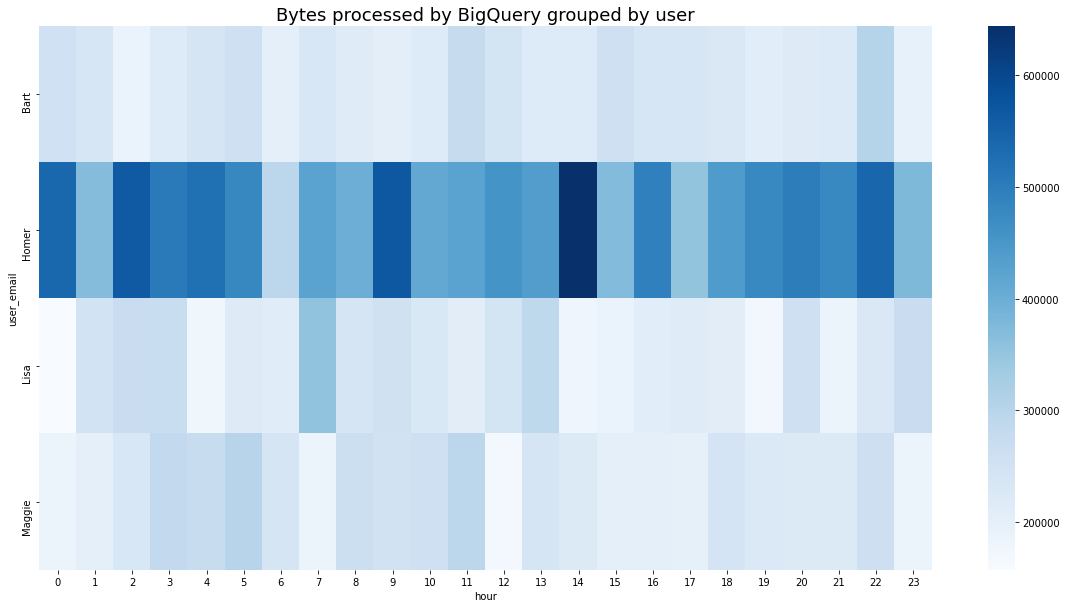

In [45]:
fig = plt.figure(figsize=(20,10))
plt.title("Bytes processed by BigQuery grouped by user", fontsize=18)
sns.heatmap(df_crosstab, cmap="Blues")